--- Heart Disease Prediction Model Building and Optimization ---
Libraries imported successfully!

--- Step 1: Data Acquisition & Initial Preprocessing ---
Dataset loaded successfully from: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Shape of the original dataset: (303, 14)
Binary Target Variable Distribution:
target
0    0.541254
1    0.458746
Name: proportion, dtype: float64
Missing values before imputation:
ca      4
thal    2
dtype: int64
Missing values after imputation:
Series([], dtype: int64)
All missing values handled.

Data split into X_train:(242, 13), X_test:(61, 13), y_train:(242,), y_test:(61,)

--- Step 2: Setting up Feature Preprocessing Pipeline ---
ColumnTransformer for numerical scaling and categorical one-hot encoding created.

--- Step 3: Model Building, Training, and Evaluation ---

--- Training Logistic Regression ---
Logistic Regression trained in 0.04 seconds.
Accuracy: 0.8852
Classification Report:
           

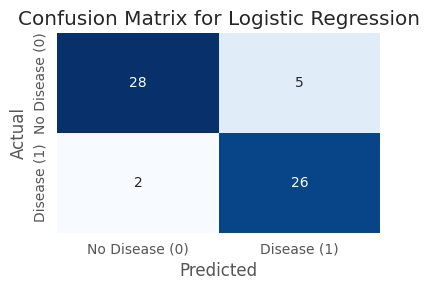

ROC AUC Score: 0.9665

--- Training K-Nearest Neighbors ---
Applying GridSearchCV for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 6}
K-Nearest Neighbors trained in 3.95 seconds.
Accuracy: 0.8852
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[30  3]
 [ 4 24]]


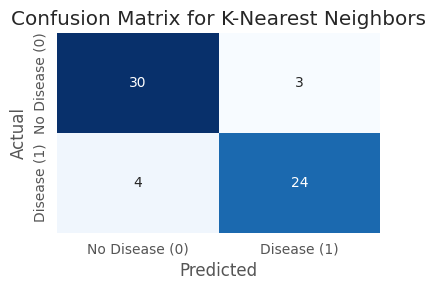

ROC AUC Score: 0.9605

--- Training Support Vector Machine ---
Support Vector Machine trained in 0.02 seconds.
Accuracy: 0.8852
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[28  5]
 [ 2 26]]


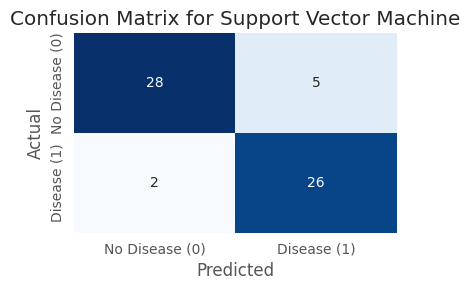

ROC AUC Score: 0.9643

--- Training Decision Tree ---
Decision Tree trained in 0.01 seconds.
Accuracy: 0.7377
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Confusion Matrix:
[[22 11]
 [ 5 23]]


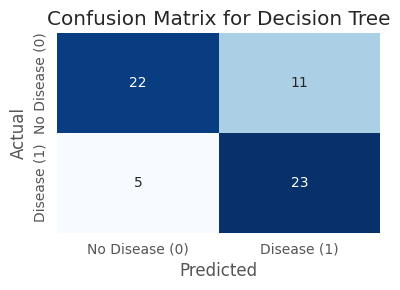

ROC AUC Score: 0.7440

--- Training Random Forest ---
Applying GridSearchCV for Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 20}
Random Forest trained in 22.24 seconds.
Accuracy: 0.8197
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
[[26  7]
 [ 4 24]]


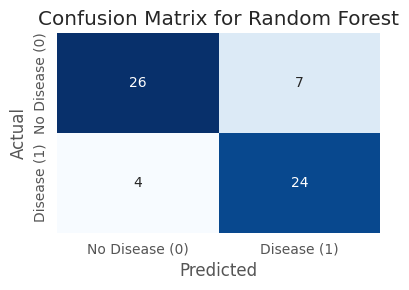

ROC AUC Score: 0.9150

--- Summary of Model Performance (Accuracy on Test Set) ---
Logistic Regression: 0.8852
K-Nearest Neighbors: 0.8852
Support Vector Machine: 0.8852
Random Forest: 0.8197
Decision Tree: 0.7377

--- Step 4: Saving Trained Models and Preprocessing Artifacts ---
All trained models saved successfully to 'trained_models/heart_disease_models.pkl'.
Preprocessor saved successfully to 'trained_models/heart_disease_preprocessor.pkl'.
Imputer for 'ca' saved successfully to 'trained_models/imputer_ca.pkl'.
Imputer for 'thal' saved successfully to 'trained_models/imputer_thal.pkl'.

--- ML Pipeline Execution Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle
import time
import os # To manage file paths

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set style for plots
sns.set_style("whitegrid")
plt.style.use("ggplot")

print("--- Heart Disease Prediction Model Building and Optimization ---")
print("Libraries imported successfully!")

# Define global constants for file paths
MODELS_DIR = 'trained_models'
MODELS_FILE = os.path.join(MODELS_DIR, 'heart_disease_models.pkl')
PREPROCESSOR_FILE = os.path.join(MODELS_DIR, 'heart_disease_preprocessor.pkl')
IMPUTER_CA_FILE = os.path.join(MODELS_DIR, 'imputer_ca.pkl')
IMPUTER_THAL_FILE = os.path.join(MODELS_DIR, 'imputer_thal.pkl')


def load_and_preprocess_data(url="http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"):
    """
    Loads the heart disease dataset, handles initial cleaning, target transformation,
    and imputes missing values.
    Returns the cleaned DataFrame and fitted imputers.
    """
    print("\n--- Step 1: Data Acquisition & Initial Preprocessing ---")
    column_names = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]

    try:
        df = pd.read_csv(url, names=column_names, na_values='?')
        print(f"Dataset loaded successfully from: {url}")
        print(f"Shape of the original dataset: {df.shape}")
    except Exception as e:
        print(f"Error loading dataset: {e}")
        print("Please check the URL or your internet connection.")
        return None, None, None

    # Target Transformation
    df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
    print(f"Binary Target Variable Distribution:\n{df['target'].value_counts(normalize=True)}")

    # Handle Missing Values in 'ca' and 'thal'
    print("Missing values before imputation:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    imputer_ca = SimpleImputer(strategy='most_frequent')
    df['ca'] = imputer_ca.fit_transform(df[['ca']])

    imputer_thal = SimpleImputer(strategy='most_frequent')
    df['thal'] = imputer_thal.fit_transform(df[['thal']])

    print("Missing values after imputation:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    if df.isnull().sum().sum() == 0:
        print("All missing values handled.")

    return df, imputer_ca, imputer_thal

def setup_feature_pipeline(df):
    """
    Defines feature types and sets up the ColumnTransformer for preprocessing.
    Returns the preprocessor object.
    """
    print("\n--- Step 2: Setting up Feature Preprocessing Pipeline ---")
    categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    assert set(categorical_features + numerical_features) == set(df.columns.drop('target')), \
        "Mismatch between defined features and DataFrame columns!"

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )
    print("ColumnTransformer for numerical scaling and categorical one-hot encoding created.")
    return preprocessor, numerical_features, categorical_features

def train_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor):
    """
    Trains and evaluates multiple machine learning models with the given data and preprocessor.
    Returns a dictionary of trained models and their performance.
    """
    print("\n--- Step 3: Model Building, Training, and Evaluation ---")

    trained_models = {}
    model_performance = {}

    # Define models with their respective pipelines
    models = {
        'Logistic Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                              ('classifier', LogisticRegression(random_state=42, solver='liblinear'))]),
        'K-Nearest Neighbors': Pipeline(steps=[('preprocessor', preprocessor),
                                              ('classifier', KNeighborsClassifier())]),
        'Support Vector Machine': Pipeline(steps=[('preprocessor', preprocessor),
                                                 ('classifier', SVC(random_state=42, probability=True))]),
        'Decision Tree': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', DecisionTreeClassifier(random_state=42))]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', RandomForestClassifier(random_state=42))])
    }

    # Hyperparameter grids for GridSearchCV
    param_grids = {
        'K-Nearest Neighbors': {'classifier__n_neighbors': range(2, 21)},
        'Random Forest': {
            'classifier__n_estimators': [10, 20, 50, 100, 200],
            'classifier__max_features': ['sqrt', 'log2'],
            'classifier__max_depth': [None, 10, 20]
        }
    }

    for name, model_pipeline in models.items():
        print(f"\n--- Training {name} ---")
        start_time = time.time()

        if name in param_grids:
            print(f"Applying GridSearchCV for {name}...")
            grid_search = GridSearchCV(model_pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            trained_models[name] = best_model
            print(f"Best parameters for {name}: {grid_search.best_params_}")
        else:
            model_pipeline.fit(X_train, y_train)
            best_model = model_pipeline
            trained_models[name] = best_model

        end_time = time.time()
        print(f"{name} trained in {end_time - start_time:.2f} seconds.")

        # Evaluation
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_performance[name] = accuracy

        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        print("Confusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        # Plotting Confusion Matrix (optional, can be commented out for cleaner console output)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['No Disease (0)', 'Disease (1)'],
                    yticklabels=['No Disease (0)', 'Disease (1)'])
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

        try:
            y_pred_proba = best_model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        except AttributeError:
            print("Model does not support predict_proba for ROC AUC score.")

    print("\n--- Summary of Model Performance (Accuracy on Test Set) ---")
    for name, acc in sorted(model_performance.items(), key=lambda item: item[1], reverse=True):
        print(f"{name}: {acc:.4f}")

    return trained_models, model_performance

def save_artifacts(trained_models, preprocessor, imputer_ca, imputer_thal):
    """
    Saves the trained models, preprocessor, and imputers to disk.
    """
    print("\n--- Step 4: Saving Trained Models and Preprocessing Artifacts ---")

    # Create directory if it doesn't exist
    os.makedirs(MODELS_DIR, exist_ok=True)

    try:
        with open(MODELS_FILE, 'wb') as file:
            pickle.dump(trained_models, file)
        print(f"All trained models saved successfully to '{MODELS_FILE}'.")

        with open(PREPROCESSOR_FILE, 'wb') as file:
            pickle.dump(preprocessor, file)
        print(f"Preprocessor saved successfully to '{PREPROCESSOR_FILE}'.")

        with open(IMPUTER_CA_FILE, 'wb') as file:
            pickle.dump(imputer_ca, file)
        print(f"Imputer for 'ca' saved successfully to '{IMPUTER_CA_FILE}'.")

        with open(IMPUTER_THAL_FILE, 'wb') as file:
            pickle.dump(imputer_thal, file)
        print(f"Imputer for 'thal' saved successfully to '{IMPUTER_THAL_FILE}'.")

    except Exception as e:
        print(f"Error saving artifacts: {e}")

def main():
    """Main function to orchestrate the entire ML pipeline."""
    df, imputer_ca, imputer_thal = load_and_preprocess_data()
    if df is None:
        print("Data loading failed. Exiting.")
        return

    # Define X and y after all direct DataFrame modifications
    X = df.drop('target', axis=1)
    y = df['target']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"\nData split into X_train:{X_train.shape}, X_test:{X_test.shape}, y_train:{y_train.shape}, y_test:{y_test.shape}")

    preprocessor, numerical_features, categorical_features = setup_feature_pipeline(df)

    trained_models, model_performance = train_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)

    save_artifacts(trained_models, preprocessor, imputer_ca, imputer_thal)

    print("\n--- ML Pipeline Execution Complete ---")

if __name__ == "__main__":
    main()